In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_path = ('/mnt/d/retraining_BirdNET_2025/model_test/results/AL_progress.csv')
df = pd.read_csv(data_path)

In [ ]:
# Separate models
base_models = df.iloc[:4]  # BN to Model 2
branch_models = df.iloc[4:]  # Model 3 options

In [ ]:
# Set up x-axis positions
x_positions = list(range(len(base_models)))  # [0, 1, 2, 3]
x_model_3 = len(base_models)                 # position for "Model 3"
x_all = x_positions + [x_model_3]
x_labels = base_models['model'].tolist() + ["Model 3"]


In [ ]:
# Plot base line
plt.figure(figsize=(10, 6))
plt.plot(x_positions, base_models["mAP_owls"], marker='o', linewidth=2, color="coral")



# Connect each Model 3 variant from last base model
last_x = x_positions[-1]
last_y = base_models["mAP_owls"].iloc[-1]
colors = ['palevioletred', 'orange', 'cadetblue']

for i, (idx, row) in enumerate(branch_models.iterrows()):
    branch_y = row["mAP_owls"]
    offset = (i - 1) * 0.1  # Slight x offset for spacing
    branch_x = x_model_3 + offset
    plt.plot([last_x, branch_x], [last_y, branch_y], color=colors[i], alpha=0.7)
    plt.scatter(branch_x, branch_y, color=colors[i], label=row["model"], zorder=5)

  

# X-axis
plt.xticks(x_all, x_labels, rotation=30)
plt.xlabel("Model Iteration", fontsize=14)
plt.ylabel("Macro mAP", fontsize=14)
plt.title("Active Learning Progress (Owl classes)", fontsize=16)
plt.ylim(0.1, 0.6)
plt.legend (loc= 'lower right',fontsize=10)
plt.tight_layout()

# Save before showing
output_dir = os.path.dirname(data_path)
plot_path = os.path.join(output_dir, "AL_Process_Owls.png")
plt.savefig(plot_path, dpi=300)

#Show plot
plt.show()

Maybe later will be usefull to plot how many ARU clips does the training set contains...At least for the event classes. To show improvement due to the progress from adding more ARU clips. 

### New plots after it4

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = ('/mnt/d/retraining_BirdNET_2025/model_test/results/AL_progress_latest.csv')
df = pd.read_csv(data_path)

In [3]:
df

,model,sensitivity,threshold,event classes,non-event classes,mAP,mAP_owls
0,BN,1,0.01,31,3,0.2482,0.1245
1,Model-0,1,0.01,31,3,0.5173,0.5338
2,Model-1,1,0.01,31,3,0.5126,0.5082
3,Model-2,1,0.01,31,3,0.5164,0.4978
4,Model-3,1,0.01,31,5,0.5405,0.5321
5,Model-4,1,0.01,31,5,0.5282,0.5145
6,Model-5,1,0.01,31,5,0.5332,0.5119
7,Model-6,1,0.01,31,5,0.5145,0.5032
8,Model-7,1,0.01,31,5,0.5223,0.4932
9,Model-8,1,0.01,31,5,0.5318,0.5103


In [4]:
# Set up x-axis positions
x_positions = list(range(len(df['model']))) 
x_labels = df['model'].tolist()

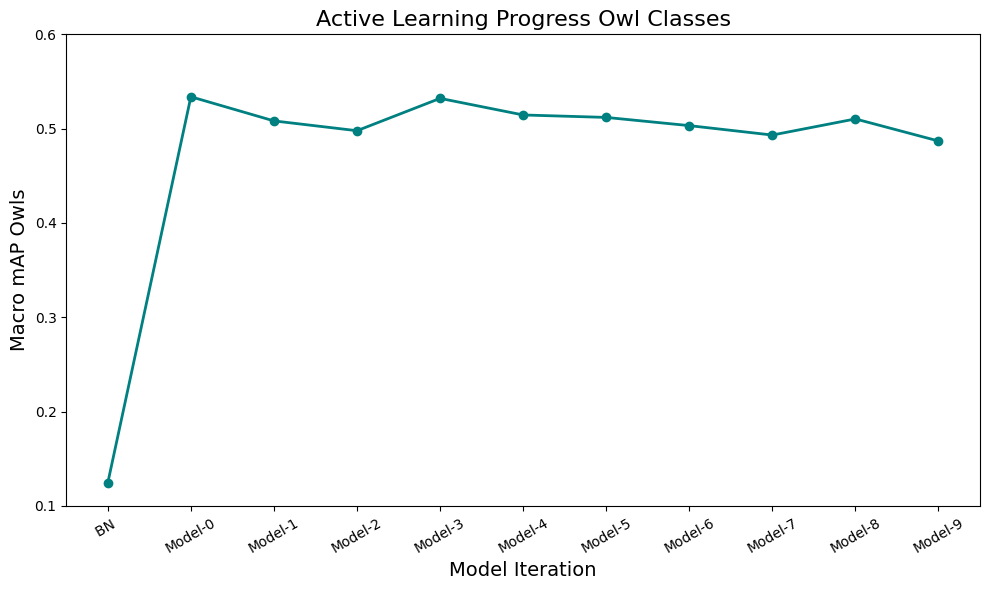

In [6]:
# Plot base line
plt.figure(figsize=(10, 6))
plt.plot(x_positions, df['mAP_owls'], marker='o', linewidth=2, color="teal")


plt.xticks(x_positions, x_labels, rotation=30)
plt.xlabel("Model Iteration", fontsize=14)
plt.ylabel("Macro mAP Owls", fontsize=14)
plt.title("Active Learning Progress Owl Classes", fontsize=16)
plt.ylim(0.1, 0.6)
#plt.legend (loc= 'lower right',fontsize=10)
plt.tight_layout()

# Save before showing
output_dir = os.path.dirname(data_path)
plot_path = os.path.join(output_dir, "AL_Process_Owls.png")
plt.savefig(plot_path, dpi=300)

#Show plot
plt.show()